# 의사결정나무

In [1]:
# 패키지 및 라이브러리 불러오기

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [2]:
# 데이터 가져오기

df = pd.read_csv("./sample_data.csv", encoding = "cp949")

In [3]:
# 날짜 형식으로 변환 후 date_diff열 생성

df['buy_date'] = pd.to_datetime(df['buy_date'], errors='coerce')
df['cart_date'] = pd.to_datetime(df['cart_date'], errors='coerce')
df['date_diff'] = (df['buy_date'] - df['cart_date']).dt.days
df['date_diff'] = df['date_diff'].fillna(0).astype(int)

In [4]:
df.drop(['address','cart_date', 'buy_date','Unnamed: 12', 'Unnamed: 13'], axis = 1, inplace = True)
df

,NUMBER,name,gender,age,phone_num,email,funnel,buy_yn,Goods,date_diff
0,1,OOO,F,31,010-****-****,****@gmail.com,Direct,N,NaN,0
1,2,OOO,M,48,010-****-****,****@gmail.com,Direct,Y,T-shirt,5
2,3,OOO,M,41,010-****-****,****@gmail.com,Paid,Y,bottle,42
3,4,OOO,M,40,010-****-****,****@gmail.com,Paid,Y,bike,18
4,5,OOO,M,22,010-****-****,****@gmail.com,Paid,N,NaN,0
...,...,...,...,...,...,...,...,...,...,...
995,996,OOO,F,64,010-****-****,****@gmail.com,Cross,Y,T-shirt,98
996,997,OOO,M,48,010-****-****,****@gmail.com,Direct,N,NaN,0
997,998,OOO,M,37,010-****-****,****@gmail.com,Cross,N,NaN,0
998,999,OOO,M,22,010-****-****,****@gmail.com,Cross,Y,T-shirt,43


In [5]:
# LabelEncoder를 사용하여 범주형 데이터를 숫자로 변환
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

In [6]:
df.head()

,NUMBER,name,gender,age,phone_num,email,funnel,buy_yn,Goods,date_diff
0,1,0,0,31,0,0,1,0,6,0
1,2,0,1,48,0,0,1,1,0,5
2,3,0,1,41,0,0,3,1,2,42
3,4,0,1,40,0,0,3,1,1,18
4,5,0,1,22,0,0,3,0,6,0


In [7]:
# NaN 값을 0으로 대체
imputer = SimpleImputer(strategy='constant', fill_value=0)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns, index=df.index)

In [8]:
# 특성과 레이블 분리
X = df_imputed.drop(['buy_yn'], axis=1)
y = df_imputed['buy_yn']

In [9]:
# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=121)

In [10]:
# 의사결정나무 모델 학습
clf = DecisionTreeClassifier(random_state=42)
dt_clf_model = clf.fit(X_train, y_train)

In [11]:
y_pred

NameError: name 'y_pred' is not defined

In [ ]:
# 의사결정나무 시각화
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns,
          class_names=[str(c) for c in clf.classes_], filled=True)
plt.show()

In [12]:
# 첫번째 줄: 분류 기준

# 지니 불순도 (Gini Impurity): 각 노드의 불순도를 나타내는 지니 지수가 표시됩니다. 불순도는 해당 노드의 데이터가 혼합된 정도를 나타냅니다. 낮은 지니 지수는 좋은 모델을 나타냅니다.

# 샘플 수 (Samples): 각 노드에서의 전체 샘플 수가 표시됩니다.

# 클래스 분포 (Values): 각 클래스의 분포가 표시됩니다. 분류 문제의 경우 각 클래스에 속하는 샘플 수를 의미합니다.

In [13]:
from sklearn.metrics import classification_report

In [14]:
# 테스트 데이터로 예측

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       169

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



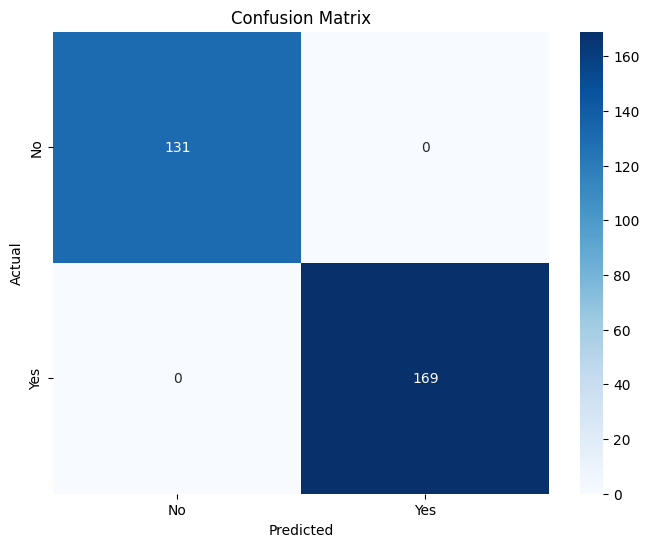

In [15]:
# 혼동 행렬
conf_matrix = confusion_matrix(y_test, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
# Goods: {0:T-shirt, 1: bike, 2: bottle, 3: notebook, 4: pen, 5: sticker, 6: Null}
# funnel: {0: Cross, 1: Direct, 2: Organic, 3: Paid}

In [17]:
from sklearn.metrics import PrecisionRecallDisplay

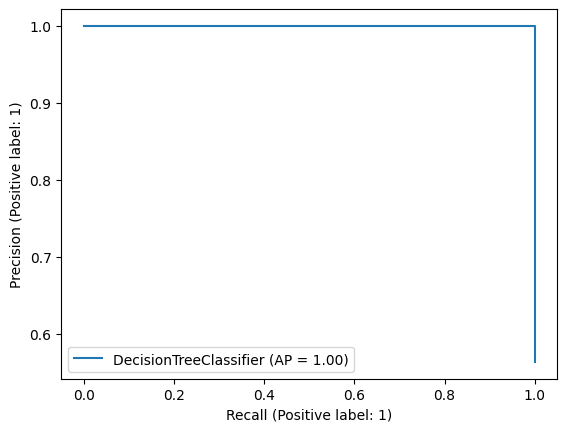

In [18]:
# Precision-Recall 커브 확인하기

PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)

In [19]:
from sklearn.metrics import RocCurveDisplay

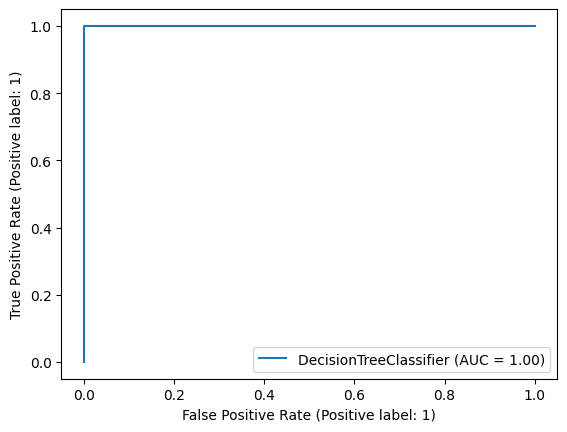

In [20]:
# ROC 커브 확인하기

fig = plt.figure()
ax = fig.gca()
RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax)